# Features


In [18]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
os.chdir("..")   # go up one folder
print(os.getcwd())  # confirm it's now the project root

# Paths to raw npz data
TILE_TRAIN = "data/raw/npz_all/npz/tile/xla/train"
TILE_VALID = "data/raw/npz_all/npz/tile/xla/valid"
TILE_TEST  = "data/raw/npz_all/npz/tile/xla/test"

LAYOUT_XLA_RANDOM_TRAIN   = "data/raw/npz_all/npz/layout/xla/random/train"
LAYOUT_XLA_DEFAULT_TRAIN  = "data/raw/npz_all/npz/layout/xla/default/train"
LAYOUT_NLP_RANDOM_TRAIN   = "data/raw/npz_all/npz/layout/nlp/random/train"
LAYOUT_NLP_DEFAULT_TRAIN  = "data/raw/npz_all/npz/layout/nlp/default/train"

PB_LAYOUT_ROOT = "data/raw/pb/pb/layout"


/Users/tanpinyee/Documents/GitHub/predict-ai-model-runtime


In [19]:
TILE_TRAIN = "data/raw/npz_all/npz/tile/xla/train"
LAYOUT_TRAIN = "data/raw/npz_all/npz/layout/xla/random/train"


In [20]:
tile_rows = []

for f in tqdm(os.listdir(TILE_TRAIN)[:1000]):  # sample subset to start
    path = os.path.join(TILE_TRAIN, f)
    d = np.load(path, allow_pickle=True)
    
    node_feat = d["node_feat"]
    config_feat = d["config_feat"]
    runtime = d["config_runtime"].astype(float)
    normalizer = d["config_runtime_normalizers"].astype(float)
    ratio = runtime / normalizer  # normalized runtime (lower = faster)
    
    tile_rows.append({
        "file": f,
        "num_nodes": node_feat.shape[0],
        "num_edges": d["edge_index"].shape[0],
        "num_configs": config_feat.shape[0],
        "node_feat_mean": node_feat.mean(),
        "node_feat_std": node_feat.std(),
        "config_feat_mean": config_feat.mean(),
        "config_feat_std": config_feat.std(),
        "runtime_best_ns": runtime.min(),
        "runtime_best_ratio": ratio.min()
    })

tile_df = pd.DataFrame(tile_rows)
tile_df.to_csv("data/processed/tile_features.csv", index=False)
tile_df.head()


100%|██████████| 1000/1000 [00:00<00:00, 1080.83it/s]


,file,num_nodes,num_edges,num_configs,node_feat_mean,node_feat_std,config_feat_mean,config_feat_std,runtime_best_ns,runtime_best_ratio
0,transformer.4x4.bf16_-1964d3f4fc587b76.npz,34,33,437,21275.179688,297078.43750,19.698322,80.243057,183425.0,0.992716
1,mnasnet_a1_batch_128_-2c00b4aa48eb6515.npz,38,37,403,8301.613281,128798.65625,7.750620,50.354492,132020.0,0.982055
2,resnet_v2_200_batch_64_-56670efcbaa402de.npz,2,1,414,16866.968750,198682.28125,7.184179,49.660229,49760.0,0.935444
3,retinanet.4x4.fp32_5045ab5a5565be70.npz,14,13,166,13252.640625,176248.93750,6.176456,42.516449,64071.0,0.958186
4,efficientnet_b7_eval_batch_1_-5ac1b66665d93955...,59,61,728,13431.564453,260342.31250,9.964343,43.120239,205101.0,0.988515


In [21]:
layout_rows = []

for f in tqdm(os.listdir(LAYOUT_TRAIN)[:300]):  # fewer because they’re huge
    path = os.path.join(LAYOUT_TRAIN, f)
    d = np.load(path, allow_pickle=True)
    
    node_feat = d["node_feat"]
    config_feat = d["node_config_feat"]
    runtime = d["config_runtime"].astype(float)

    layout_rows.append({
        "file": f,
        "num_nodes": node_feat.shape[0],
        "num_edges": d["edge_index"].shape[0],
        "num_configurable_nodes": d["node_config_ids"].shape[0],
        "num_runs": runtime.shape[0],
        "node_feat_mean": node_feat.mean(),
        "node_feat_std": node_feat.std(),
        "config_feat_mean": config_feat.mean(),
        "config_feat_std": config_feat.std(),
        "runtime_min_ns": runtime.min(),
        "runtime_mean_ns": runtime.mean(),
        "runtime_max_ns": runtime.max(),
        "runtime_spread_ns": runtime.max() - runtime.min()
    })

layout_df = pd.DataFrame(layout_rows)
layout_df.to_csv("data/processed/layout_features.csv", index=False)
layout_df.head()


100%|██████████| 69/69 [00:34<00:00,  1.99it/s]


,file,num_nodes,num_edges,num_configurable_nodes,num_runs,node_feat_mean,node_feat_std,config_feat_mean,config_feat_std,runtime_min_ns,runtime_mean_ns,runtime_max_ns,runtime_spread_ns
0,brax_es.npz,4185,7209,81,100040,955.849670,31534.181641,-0.785100,0.661749,4729001.0,1.004016e+07,19567302.0,14838301.0
1,transformer.4x4.fp32.performance.npz,26234,48094,1777,15704,1847.280151,122750.757812,-0.770699,0.762988,53452292.0,7.415945e+07,98656219.0,45203927.0
2,resnet50.8x8.fp32.npz,5345,8775,166,10664,25011.494141,833350.875000,-0.089441,1.519717,114509310.0,1.906543e+08,268757330.0,154248020.0
3,bert_pretraining.8x16.fp16.npz,21335,37236,1142,19128,2973.868164,125941.398438,-0.741738,0.799195,46152420.0,5.607547e+07,67327314.0,21174894.0
4,transformer.2x2.fp32.npz,7324,12087,414,22992,6366.241699,236047.015625,-0.131932,1.355835,50591575.0,8.265765e+07,114871545.0,64279970.0


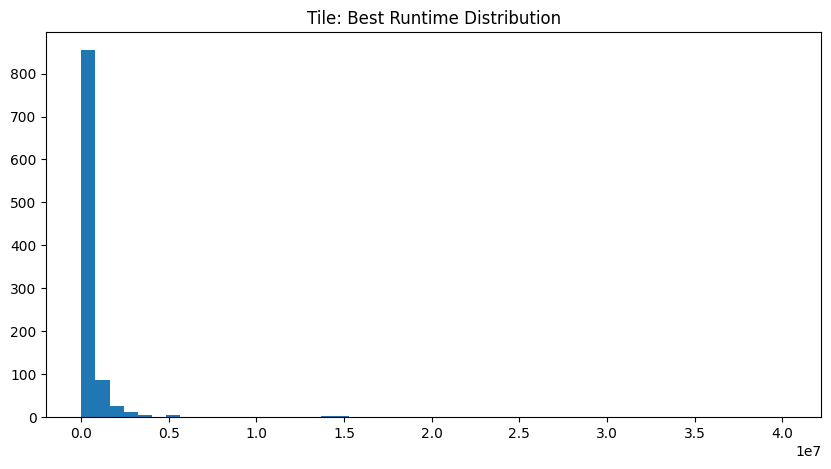

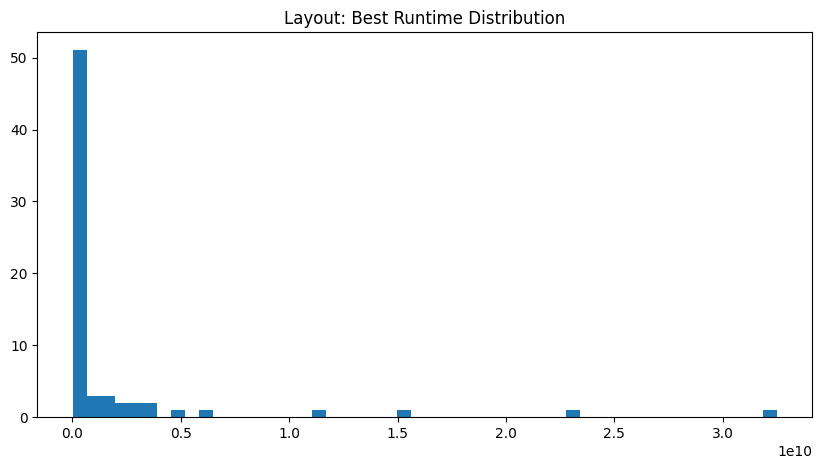

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(tile_df["runtime_best_ns"], bins=50)
plt.title("Tile: Best Runtime Distribution")
plt.show()

plt.figure(figsize=(10,5))
plt.hist(layout_df["runtime_min_ns"], bins=50)
plt.title("Layout: Best Runtime Distribution")
plt.show()


In [23]:
tile_df["type"] = "tile"
layout_df["type"] = "layout"
summary = pd.concat([tile_df, layout_df], ignore_index=True)
summary.to_csv("data/processed/all_features.csv", index=False)
